In [1]:
%pip install torch
%pip install torchvision


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: /opt/homebrew/Cellar/jupyterlab/4.0.6/libexec/bin/python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: /opt/homebrew/Cellar/jupyterlab/4.0.6/libexec/bin/python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor
torch.set_printoptions(sci_mode=False, precision=4)

In [3]:
# Download training data from open datasets.
training_data = datasets.MNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
)

# Download test data from open datasets.
test_data = datasets.MNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
)

In [4]:
batch_size = 64

# Create data loaders.
train_dataloader = DataLoader(training_data, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)

for X, y in test_dataloader:
    print(f"Shape of X [N, C, H, W]: {X.shape}")
    print(f"Shape of y: {y.shape} {y.dtype}")
    break

Shape of X [N, C, H, W]: torch.Size([64, 1, 28, 28])
Shape of y: torch.Size([64]) torch.int64


In [5]:
y[0]

tensor(7)

In [6]:
x = X[0].squeeze()
for row in x:
    for item in row:
        pixel = 0
        if item.item() > 0:
            pixel = 1
        print(pixel, end=" ")
    print()

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 
0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1

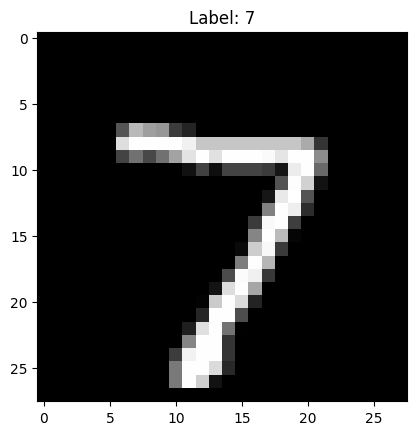

In [7]:
import matplotlib.pyplot as plt
def show_image(image, label):
    plt.imshow(image.squeeze(), cmap='gray')
    plt.title(f'Label: {label}')
    plt.show()
show_image(X[0], y[0])

In [8]:
# Get cpu, gpu or mps device for training.
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

Using mps device


In [9]:
# Define model
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10)
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


In [10]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

In [11]:
x = X[:1].to(device)
pred = model(x)
print(pred, pred.shape)

tensor([[-0.0098, -0.0101, -0.0528, -0.0755, -0.0253,  0.0151,  0.0595,  0.0199,
          0.0427,  0.0480]], device='mps:0', grad_fn=<LinearBackward0>) torch.Size([1, 10])


In [21]:
nn.Softmax(dim=1)(pred)

tensor([[0.0988, 0.0988, 0.0947, 0.0925, 0.0973, 0.1013, 0.1059, 0.1018, 0.1042,
         0.1047]], device='mps:0', grad_fn=<SoftmaxBackward0>)

In [22]:
y[0]

tensor(7)

In [24]:
nn.Softmax(dim=1)(pred)[0][7]

tensor(0.1018, device='mps:0', grad_fn=<SelectBackward0>)

In [25]:
from math import log
-log(0.1018)

2.284745174865715

In [12]:
loss_fn(pred, y[:1].to(device))

tensor(2.2848, device='mps:0', grad_fn=<NllLossBackward0>)

In [13]:
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        # Compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        if batch % 100 == 0:
            loss, current = loss.item(), (batch + 1) * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

In [14]:
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [15]:
import time
start = time.time()
epochs = 5
test(test_dataloader, model, loss_fn)
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_dataloader, model, loss_fn, optimizer)
    test(test_dataloader, model, loss_fn)
print("Done in ", time.time() - start, " seconds")

Test Error: 
 Accuracy: 9.9%, Avg loss: 2.305079 

Epoch 1
-------------------------------
loss: 2.305354  [   64/60000]
loss: 2.306510  [ 6464/60000]
loss: 2.295852  [12864/60000]
loss: 2.295866  [19264/60000]
loss: 2.290308  [25664/60000]
loss: 2.285594  [32064/60000]
loss: 2.271096  [38464/60000]
loss: 2.269572  [44864/60000]
loss: 2.274406  [51264/60000]
loss: 2.261976  [57664/60000]
Test Error: 
 Accuracy: 41.3%, Avg loss: 2.261502 

Epoch 2
-------------------------------
loss: 2.260743  [   64/60000]
loss: 2.257151  [ 6464/60000]
loss: 2.258801  [12864/60000]
loss: 2.238646  [19264/60000]
loss: 2.243764  [25664/60000]
loss: 2.237744  [32064/60000]
loss: 2.214426  [38464/60000]
loss: 2.227140  [44864/60000]
loss: 2.216366  [51264/60000]
loss: 2.198596  [57664/60000]
Test Error: 
 Accuracy: 57.8%, Avg loss: 2.200028 

Epoch 3
-------------------------------
loss: 2.198215  [   64/60000]
loss: 2.185686  [ 6464/60000]
loss: 2.203362  [12864/60000]
loss: 2.153223  [19264/60000]
loss:

In [16]:
start = time.time()
epochs = 95
test(test_dataloader, model, loss_fn)
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_dataloader, model, loss_fn, optimizer)
    test(test_dataloader, model, loss_fn)
print("Done in ", time.time() - start, " seconds")

Test Error: 
 Accuracy: 73.5%, Avg loss: 1.631034 

Epoch 1
-------------------------------
loss: 1.647415  [   64/60000]
loss: 1.549637  [ 6464/60000]
loss: 1.661005  [12864/60000]
loss: 1.457065  [19264/60000]
loss: 1.502079  [25664/60000]
loss: 1.463558  [32064/60000]
loss: 1.373312  [38464/60000]
loss: 1.509465  [44864/60000]
loss: 1.382244  [51264/60000]
loss: 1.311181  [57664/60000]
Test Error: 
 Accuracy: 77.3%, Avg loss: 1.301543 

Epoch 2
-------------------------------
loss: 1.346093  [   64/60000]
loss: 1.213548  [ 6464/60000]
loss: 1.340459  [12864/60000]
loss: 1.150326  [19264/60000]
loss: 1.174443  [25664/60000]
loss: 1.137131  [32064/60000]
loss: 1.068849  [38464/60000]
loss: 1.232008  [44864/60000]
loss: 1.119539  [51264/60000]
loss: 1.044258  [57664/60000]
Test Error: 
 Accuracy: 80.3%, Avg loss: 1.031163 

Epoch 3
-------------------------------
loss: 1.100121  [   64/60000]
loss: 0.954179  [ 6464/60000]
loss: 1.075944  [12864/60000]
loss: 0.927328  [19264/60000]
loss

In [ ]:
import time
start = time.time()
epochs = 95
test(test_dataloader, model, loss_fn)
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_dataloader, model, loss_fn, optimizer)
    test(test_dataloader, model, loss_fn)
print("Done in ", time.time() - start, " seconds")

In [18]:
preds = model(X[0].to(device))
preds

tensor([[ 0.6160, -5.7304,  2.7560,  4.3435, -4.2726,  0.4242, -9.5664,  9.8647,
         -0.1756,  2.2468]], device='mps:0', grad_fn=<LinearBackward0>)

In [28]:
y[0]

tensor(7)

In [26]:
nn.Softmax(dim=1)(preds)

tensor([[    0.0001,     0.0000,     0.0008,     0.0040,     0.0000,     0.0001,
             0.0000,     0.9945,     0.0000,     0.0005]], device='mps:0',
       grad_fn=<SoftmaxBackward0>)

In [29]:
loss_fn(preds, y[:1].to(device))

tensor(0.0055, device='mps:0', grad_fn=<NllLossBackward0>)